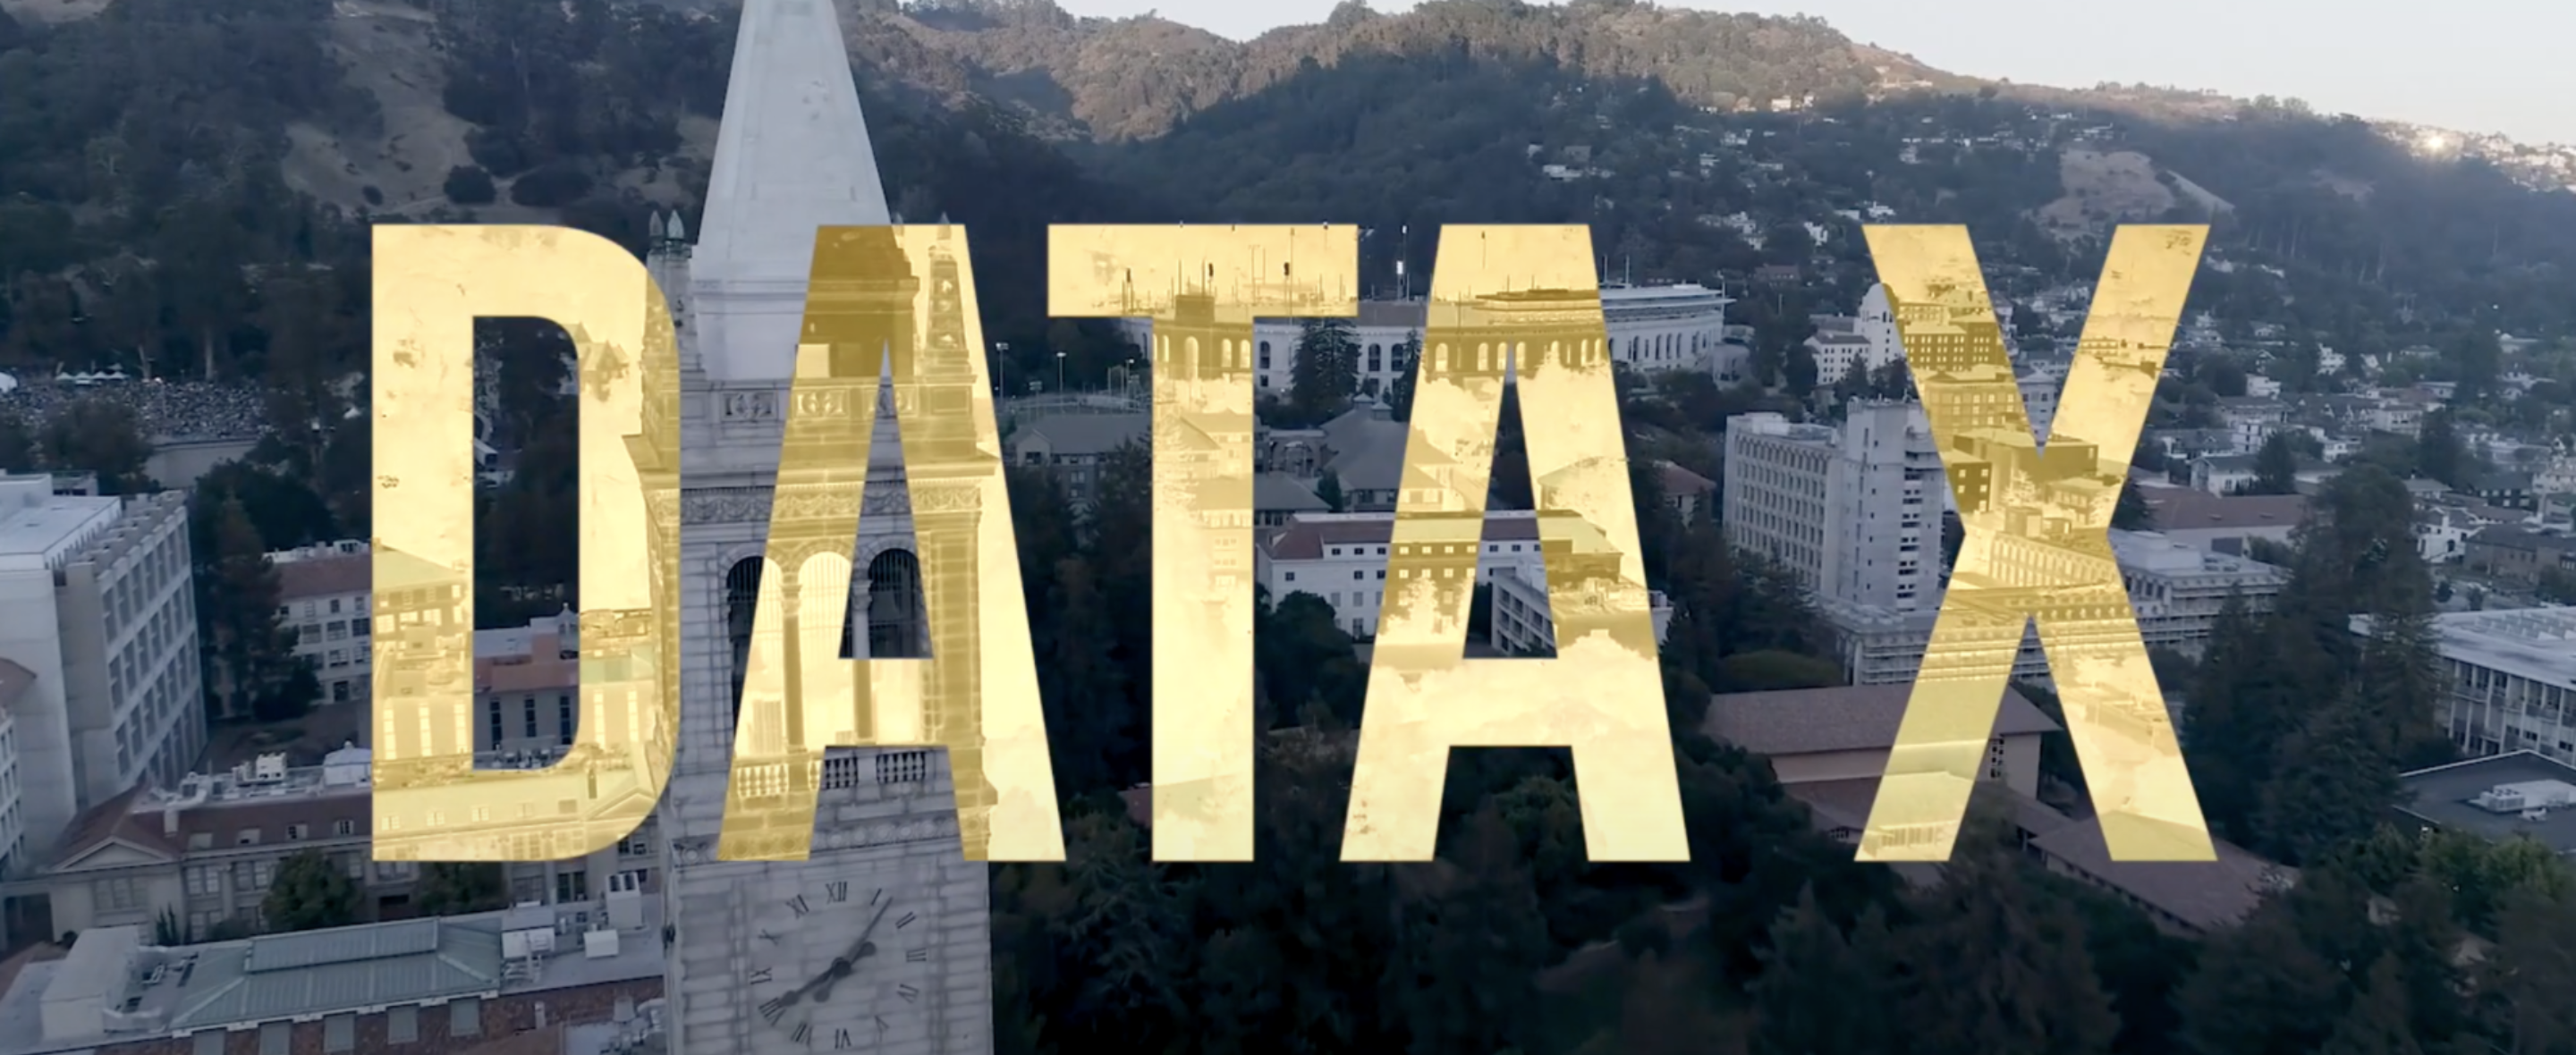

**UC Berkeley**

**Institution**: Sutardja Center for Entreprenurship & Technology (SCET)

**Course**: Data-X (INDENG 135 / 235)

**Semester**: Fall 2021

**Authors & Reviewers**: Mahan Tajrobehkar & Derek S. Chan

**Updated**: Friday, 9/10/2021 PST

**Note**: If you decide to run the notebook in Colab, an example option is to upload the GitHub datasets to the Google content root folder below, so the notebook can access.

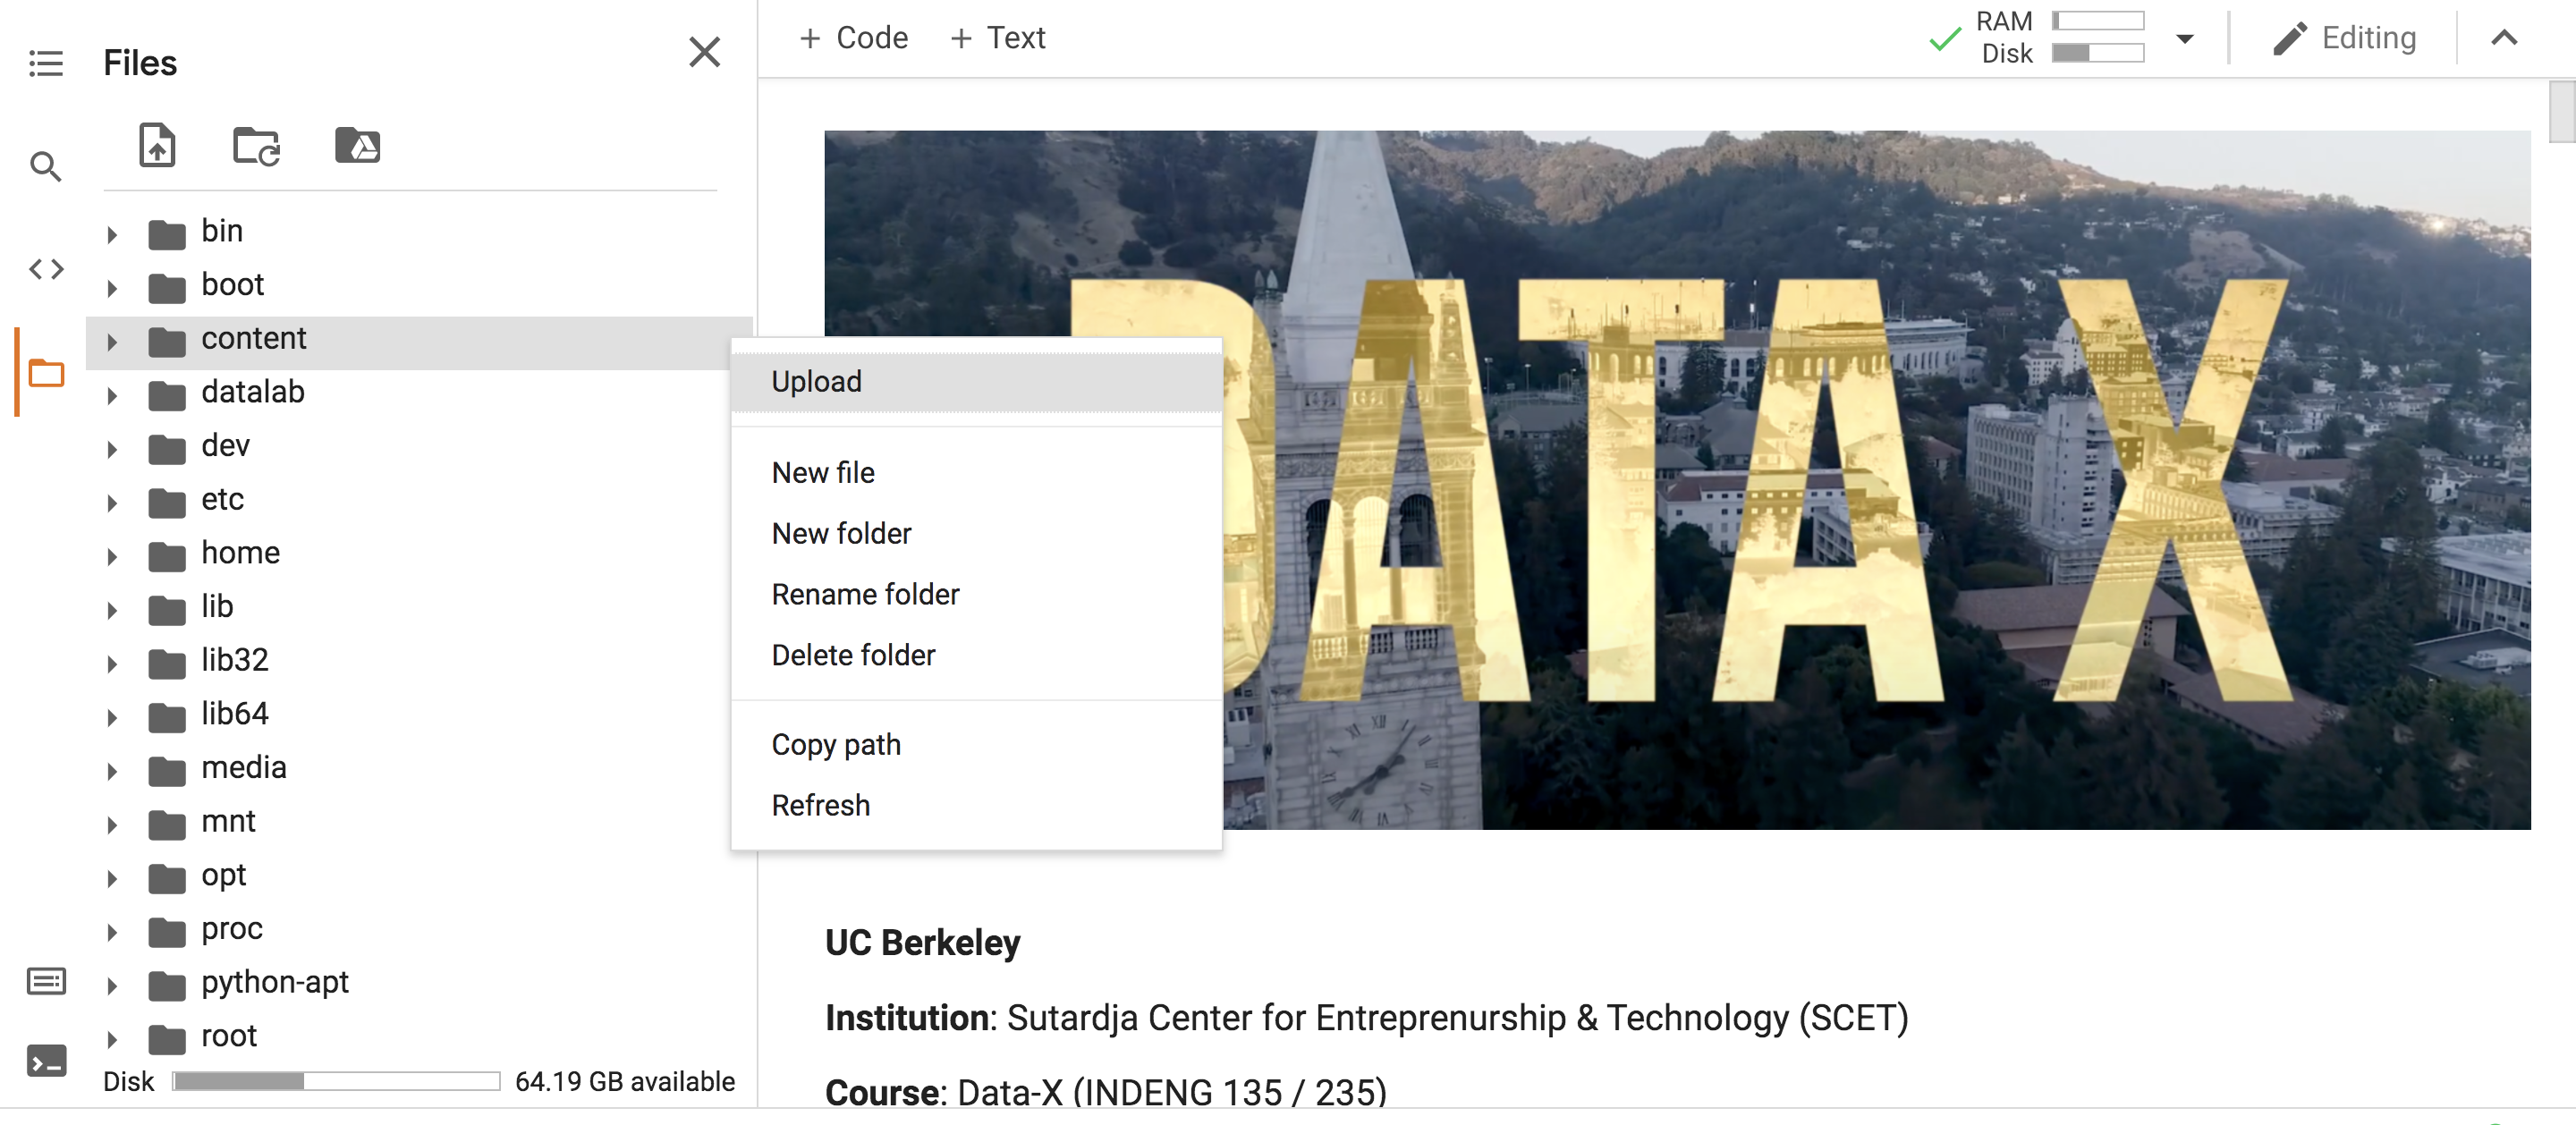

**Notebook learning objective**: 
* Understand [precision](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall), [recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall), and [threshold](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) to define success






Math-type illustration:

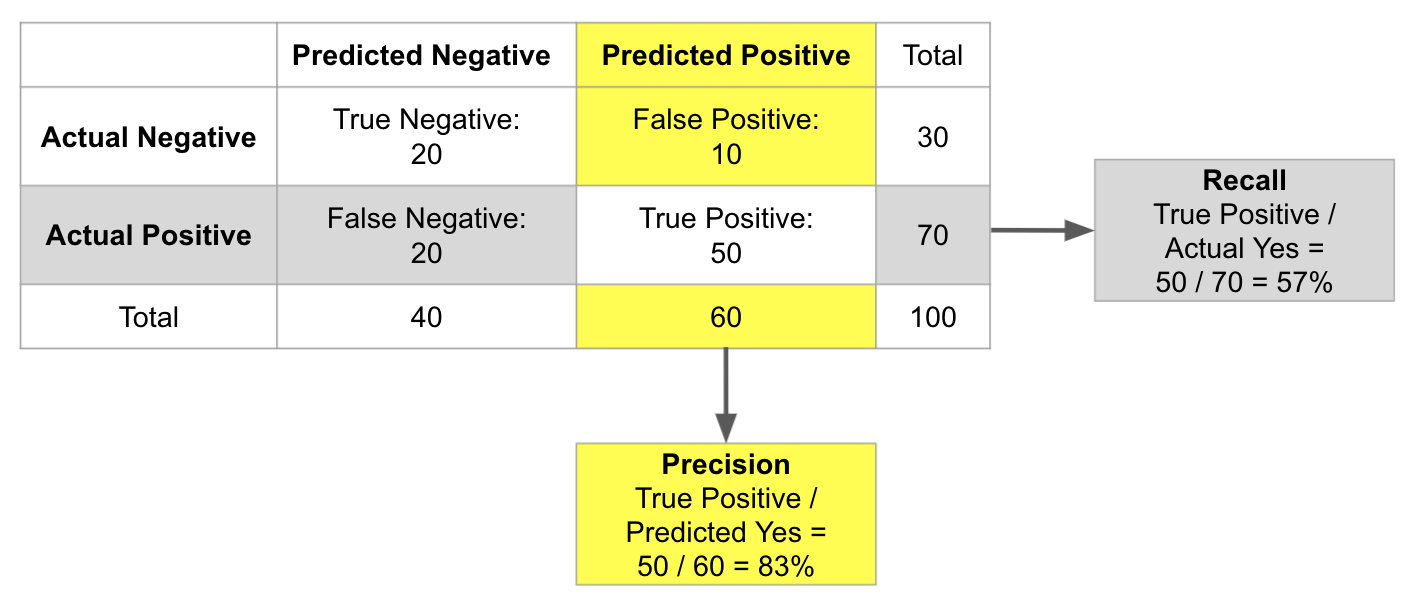

Non-math language:
* **Precision**: If you predict a positive case (e.g., cancer; spam; toxic language), % of time model is correct.

* **Recall**: Among all positive cases (e.g., cancer; spam, toxic language) encountered, % of cases the model captures.

-----

You are provided with two datasets, one for breast cancer detection, and one for spam email detection.

In each case, with binary classification (e.g., cancerous vs. non-cancerous; spam vs. email), do you regard precision or recall as your priority?

You are guided to train a logistic regression model for breast cancer detection and a SVM model for spam email detection. Along the way, you will get familiar with the following: 
- Reading in a dataset with Pandas and simple data exploration/preparation
- Feature scaling
- Creating a pipeline
- Hyperparameter tuning via cross-validation
- **Precision, recall, and threshold potential trade-offs**

In [ ]:
## Run this cell to load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# **Breast Cancer Detection**

https://www.nationalbreastcancer.org/breast-cancer-facts

"Breast cancer is a disease in which malignant (cancer) cells form in the tissues of the breast." 

* "There are over 3.8 million breast cancer survivors in the United States."
* "Breast cancer is the most common cancer in American women, except for skin cancers.
* "This year, an estimated 43,600 women will die from breast cancer in the U.S."
* "1 in 8 women in the United States will be diagnosed with breast cancer in her lifetime."
* "On average, every 2 minutes a woman is diagnosed with breast cancer in the United States."
* "Although rare, men get breast cancer too. In 2021, an estimated 2,650 men will be diagnosed with breast cancer this year in the U.S. and approximately 530 will die."

https://towardsdatascience.com/google-ai-for-breast-cancer-detection-beats-doctors-65b8983352e0

"One of the key aspects of Breast cancer is early detection, which can considerably improve the outcomes of breast cancer. Women starting between the ages of 40 and 50 are often advised to go for a mammography screening. And although these measures contribute to early detection, there can still be cases of false negatives due to the difficulty of interpreting the screening images correctly.
A false negative is when the doctors erroneously diagnostic a negative when in reality there is breast cancer in the patient. This only makes breast cancer worst to treat as it develops and is found once the visibility of the tumor increases. . .

Although this system outperformed doctors in most cases, there were other cases where doctors flagged breast cancer that was missed by the AI model."

https://www.nature.com/articles/s41586-019-1799-6 

"We ran a simulation in which the AI system participated in the double-reading process that is used in the UK, and found that the AI system maintained non-inferior performance and reduced the workload of the second reader by 88%. This robust assessment of the AI system paves the way for clinical trials to improve the accuracy and efficiency of breast cancer screening."

## **1. Dataset**

We will use the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) dataset available in the UCI Machine Learning Repository.

**Example usage of any type of cancer detection**
https://www.nature.com/articles/d41586-020-00847-2
 "NYU Langone’s Perlmutter Cancer Center received state approval to use its AI classifier as a diagnostic test in October 2019, and researchers around the world are developing similar systems to help pathologists diagnose cancer more accurately. The goal is to use AI’s ability to recognize patterns that are too subtle for the human eye to detect to guide physicians towards better-targeted therapies and to improve outcomes for patients. Some scientists are even applying AI to screening tests in the hope of identifying people with an increased cancer risk or catching the disease sooner."

**From an AI/data system perspective, what do you regard as more important?**
* Precision: If a model predicts a positive case (malignant/cancer), percent of time model is correct.
* Recall: Among all positive cases (malignant/cancer) the model encounters, percent of cases the model captures.

### **1.1 Dataset Information**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

https://www.webmd.com/a-to-z-guides/
* "Fine needle aspiration is a type of biopsy procedure. In fine needle aspiration, a thin needle is inserted into an area of abnormal-appearing tissue or body fluid.
* As with other types of biopsies, the sample collected during fine needle aspiration can help make a diagnosis or rule out conditions such as cancer."

Image source: https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection

"A magnified image of a malignant breast fine needle aspirate. Visible cell nuclei are outlined by a curve-fitting program. The Xcyt system also compares various features for each nucleus."  


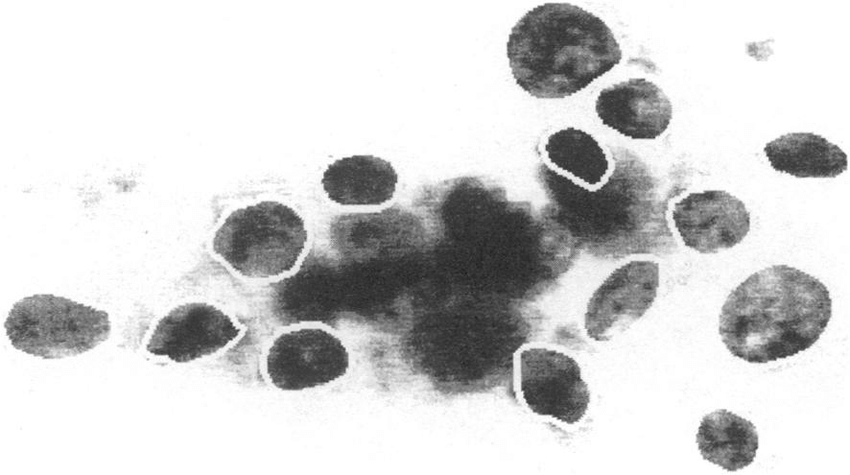

### **1.2 Attribute Information**

1) ID number\
2) Diagnosis (M = malignant, B = benign)\
3-32)
Ten real-valued features are computed for each cell nucleus:

> a) radius (mean of distances from center to points on the perimeter)\
b) texture (standard deviation of gray-scale values)\
c) perimeter\
d) area\
e) smoothness (local variation in radius lengths)\
f) compactness (perimeter^2 / area - 1.0)\
g) concavity (severity of concave portions of the contour)\
h) concave points (number of concave portions of the contour)\
i) symmetry\
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, column 3 is Mean Radius, column 13 is Radius SE, and column 23 is Worst Radius.

For [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) in the UCI Machine Learning Repository, the data is in the .data format. Here you are provided with the .csv file so that you can easily read in the dataset using Pandas. 

* If you are using Google Colab, make sure to upload `BreastCancer.csv` to the "Files" section. 
* **If you are running this notebook on your local machine and the file is in the same directory as the notebook, use the local address of** `BreastCancer.csv` **as the argument of** `read_csv`. 

In [ ]:
## Read in the dataset
df = pd.read_csv('BreastCancer.csv')

df.head(5) # display the first 5 rows of the dataset

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]

### **1.3 Data Sanity Check**

It is reported that the number of instances in this dataset is 569 each of which has 32 attributes, and there is no missing values. Also, there shoudn't be any duplicated rows. Let's double check it.

In [ ]:
## Data sanity check
print('Datast shape:', df.shape) # check for the shape of the dataset

print('\nThe number of missing entries:\n', 
      df.isna().sum(axis=0)) # check for any missing values

print('\nThe number of duplicated rows:', 
      df.duplicated().sum()) # check for any duplicated rows

Datast shape: (569, 32)

The number of missing entries:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

T

We can also check if the data type of each column is as expected. Are there any columns with unexpected data types?

In [ ]:
## Check the data type of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

According to the content, "diagnosis" would be more meaningful if represented as a categorical variable, but its type is "object" instead. Let's change it to the categorical type.

In [ ]:
## Change the data type of the "diagnosis" column
df = df.astype({'diagnosis': 'category'})

df.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

### **1.4 Data Exploration**

We want to predict the "diagnosis" column, which could either be M (malignant) or B (benign). Let's count how many data instances are labeled as M and how many as B. 

In [ ]:
## Count the number of instances in each category
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We can get the empirical distribution of each attribute using pandas hist function.

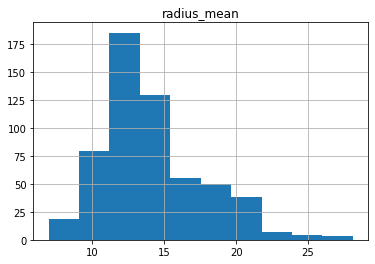

In [ ]:
## Plot the histogram of the 'radius_mean' attribute
hist = df.hist(column=['radius_mean'], bins=10)

We can also analyze different attributes within each category. 

In [ ]:
## Compute the average "radius_mean" for each category
df[["diagnosis", "radius_mean"]].groupby("diagnosis").agg(np.mean)

radius_mean
diagnosis             
B            12.146524
M            17.462830

In [ ]:
## Compute the average for each category
df.groupby("diagnosis").mean()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
diagnosis                             ...                                         
B          2.654382e+07    12.146524  ...        0.270246                 0.079442
M          3.681805e+07    17.462830  ...        0.323468                 0.091530

[2 rows x 31 columns]

## **2. Data Preparation**

### **2.1 Input and labels**

First, we need to separate the input from the labels. The "diagnosis" column contains the labels and the rest of the columns (except for the "id" column. why?) consititute the input. We will further need to convert the categorical data into numbers.

In [ ]:
## Define the input and the labels
X = df.iloc[:, 2:] # excluding the "id" and "diagnosis" columns 
y = df['diagnosis']
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
y = LabelEncoder().fit_transform(y) # encode the labels to 1 or 0

Note that the encoder has assigned 1 (positive) to M and 0 (negative) to B. 

### **2.2 Training and Test Sets**

Now, we split the dataset into training and test sets. We keep 85% of the data points for training, and 15% for the test set. Note that the test set will be used to measure the performance of our final model, and therefore it will be kept untouched until we finish the training process including the hyper-paramter tuning. 

During the training process, the training set will be further split into a smaller training set and a validation set for hyper-parameter tuning, and to evaluate precision, recall, the thresholds.

In [ ]:
## Splitting the input into training and test sets, before any scaling or modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=0) # setting the random_state enables us to reproduce the results

In [ ]:
## Split the training set further, before any scaling or modeling
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.15,
                                      random_state=0)

## **3. Logistic Regression**

In this section, we train a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model on the training set defined above and test it agaist the test set. If you are interested, you can train different models such as SVM or KNN in a similar fashion and compare the results.

### **3.1 Building a Pipeline**

Before we get into the training process, it's important to note that in a general machine learning problem different features might be on different scales negatively affecting the training process (why?). Therefore, it's almost always necessary to make sure the dataset is standardized. To this end, we use the [StandardScaler ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)function in sklearn. 

One way to use this scaler is to first scale the training and test sets and then pass the results to the main model. Alternatively, we can create a pipeline in which the first module is the aforementioned scaler and the second module is the main model, which in our case is the logistic regression. 

In [ ]:
## Create a pipeline 
## https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('lr', LogisticRegression(solver='newton-cg'))]) # a specific solver is used in the logistic regression model

### **3.2 Hyperparameter Tuning via Cross-validation**

The major hyperparameter for the logistic regression model is the regularization parameter `C`. Check the sklearn API for more information. We will sweep through a given range for this hyperparamter and pick up the best one based on the cross-validation score. We can perform this using sklearn [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Note that we need to set the scoring option in GridSearchCV. Depending on the use case, cancer detection is a situation in which recall could be considered more important than the precision, and therefore the scoring option will be set to 'recall'. Also, we will use 4-fold cross-validation. Try cross-validation with different number of folds and compare the results.

In [ ]:
## Tuning the hyperparameter C via cross-validation (scoring: recall)
# https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul
parameters = {'lr__C': np.logspace(-3, 3, 10)} # the range for parameter C
split = StratifiedKFold(4, shuffle=True, random_state=0) # defines the CV folds 
grid = GridSearchCV(pipeline, parameters, cv=split, scoring='recall')

grid.fit(X_t, y_t) # trains different pipelines on the training set
pipeline_best_recall = grid.best_estimator_ # returns the best pipeline

print('Cross-validation score (recall):', np.mean(cross_val_score(
    pipeline_best_recall, X_t, y_t, cv=split, scoring='recall')))

Cross-validation score (recall): 0.9303571428571429


The number above is the cross-validation score (recall) corresponding to the best pipeline. Let's see what is the value of hyperparameter `C` in the best pipeline. 

In [ ]:
## Optimal value for the hyperparameter C
print('The hyper-parameter C value in the best pipeline:', 
      pipeline_best_recall.named_steps['lr'].C) 

The hyper-parameter C value in the best pipeline: 0.46415888336127775


We also compute the precision corresponding to the best pipeline selected above. We will later on use these scores to see how precision and recall correlate with each other.

In [ ]:
## Comptute the precision for the best pipeline selected based on recall
print('Cross-validation score (precision):', np.mean(cross_val_score(
    pipeline_best_recall, X_t, y_t, cv=split, scoring='precision')))

Cross-validation score (precision): 0.9714052287581699


### **3.3 Precision-Recall Trade-off**

Let's see whether the value of hyperparameter `C` changes if the 'precision' option is used instead of the 'recall'. 

In [ ]:
## Tuning the hyperparameter C via cross-validation (scoring: precision)
parameters = {'lr__C': np.logspace(-3, 3, 10)}
split = StratifiedKFold(4, shuffle=True, random_state=0) 
grid = GridSearchCV(pipeline, parameters, cv=split, scoring='precision')

grid.fit(X_t, y_t) 
pipeline_best_precision = grid.best_estimator_ 

print('Cross-validation score (precision):', np.mean(cross_val_score(
    pipeline_best_precision, X_t, y_t, cv=split, scoring='precision')))

print('The hyper-parameter C value in the best pipeline:', 
      pipeline_best_precision.named_steps['lr'].C) 

Cross-validation score (precision): 0.9852941176470589
The hyper-parameter C value in the best pipeline: 0.001


As you can see, the value of hyperparameter `C` chosen based on the precision is different than the one chosen based on the recall. 

Let's compute the recall corresponding to the best pipeline obtained above. 

In [ ]:
## Comptute the recall for the best pipeline selected based on precision
print('Cross-validation score (recall):', np.mean(cross_val_score(
    pipeline_best_precision, X_t, y_t, cv=split, scoring='recall')))

Cross-validation score (recall): 0.6095238095238095


Comparing the precision and recall obtained using the best pipelines above, we have:
* Best pipeline based on recall: 
> 93.0% recall and 97.1% precision
* Best pipeline based on precision:
> 60.9% recall and 98.5% precision

These results demonstrate the trade-off between the precision and recall. Read more about this trade-off [here](https://datascience-george.medium.com/the-precision-recall-trade-off-aa295faba140#:~:text=The%20Idea%20behind%20the%20precision,to%20decrease%2C%20or%20vice%20versa.).

### **3.4 More on Precision-Recall Trade-off**

In this subsection, we will see the impact of threshold-moving on the confusing matrix, and in turn on precision and recall. 

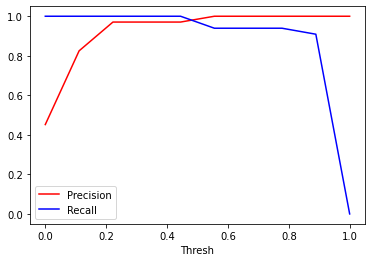

In [ ]:
## Impact of the threshold value on the precision and recall scores
pipeline_best_recall.fit(X_t, y_t) 
n = 10
thresh = np.linspace(0, 1, n) # probability thresholds
precisions = np.zeros_like(thresh)
recalls = np.zeros_like(thresh)
for i in range(n):
    C = confusion_matrix(y_v, pipeline_best_recall.predict_proba(X_v)[:, 1] >= thresh[i])
    precisions[i] = C[1, 1] / (C[1, 1] + C[0, 1]) if C[0, 1] != 0 else 1
    recalls[i] = C[1, 1] / (C[1, 1] + C[1, 0])
plt.plot(thresh, precisions, 'r', thresh, recalls, 'b')
plt.legend(['Precision', 'Recall'])
plt.xlabel('Thresh')
plt.show()

### **3.5 Testing the Final Model Against the Test Set**

So far, we have used the training set to train the model and choose the hyperparameters. Now, we pick the final model and test it against the untouched test set. This way we can measure how well the model performs on the unseen data. 

In [ ]:
## Compute the recall on the test set
pipeline_best_recall.fit(X_train, y_train) # training the best pipeline on the whole training set
thresh_chosen = 0.4
C = confusion_matrix(y_test, 
                     pipeline_best_recall.predict_proba(X_test)[:, 1] >= thresh_chosen)
print('Confusion matrix:\n', C)
print('\nRecall:', C[1, 1] / (C[1, 1] + C[1, 0]))
print('\nPrecision:', C[1, 1] / (C[1, 1] + C[0, 1]))

Confusion matrix:
 [[49  1]
 [ 0 36]]

Recall: 1.0

Precision: 0.972972972972973


### **3.6 Feature Importance**

"Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients [or weights] to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score," from [machinelearningmastery](https://machinelearningmastery.com). Coefficient=0 means no impact on the prediction.

Thus, we can use the coefficients of the `pipeline_best` trained on the training set to extract feature importance. 

In [ ]:
## Summarize feature importance
pipeline_best_recall.fit(X_t, y_t)
importance = pipeline_best_recall.named_steps['lr'].coef_[0]
importance_df = pd.DataFrame(columns=['importance'])
for i, v in enumerate(importance):
	importance_df.loc[df.iloc[:, 2:].columns[i]] = v
importance_df.sort_values(by=['importance'], ascending=False)
# decrease the power if the coefficient / weight / importance is lower

importance
texture_worst              0.924548
radius_worst               0.802288
radius_se                  0.751040
area_worst                 0.748268
concave points_worst       0.738829
perimeter_worst            0.715421
symmetry_worst             0.657067
concave points_mean        0.642494
area_se                    0.593112
concavity_worst            0.574692
concavity_mean             0.562444
perimeter_se               0.503741
smoothness_worst           0.503710
area_mean                  0.451414
radius_mean                0.425800
perimeter_mean             0.409887
fractal_dimension_worst    0.328480
texture_mean               0.305042
smoothness_se              0.221963
concave points_se          0.142430
symmetry_mean              0.127305
smoothness_mean            0.052937
concavity_se              -0.019862
compactness_worst         -0.035106
texture_se                -0.090009
symmetry_se               -0.226988
fractal_dimension_mean    -0.263278
compactness_mean          -0.334600
fractal_dimension_se      -0.412392
compactness_se            -0.426681

In [ ]:
## Compute the average for the features with the highest coefficients/weights, by benign (B) or malignant (M)
print(df[["diagnosis", "texture_worst"]].groupby("diagnosis").agg(np.mean))
print()
print(df[["diagnosis", "radius_worst"]].groupby("diagnosis").agg(np.mean))
print()
print(df[["diagnosis", "compactness_se"]].groupby("diagnosis").agg(np.mean))

           texture_worst
diagnosis               
B              23.515070
M              29.318208

           radius_worst
diagnosis              
B             13.379801
M             21.134811

           compactness_se
diagnosis                
B                0.021438
M                0.032281


# **Spam Email Detection** (requires updates to be accurate)

In this part, we will explore and understand the process of classifying emails as spam or not spam. This is called Spam Detection, which is a binary classification problem. Similar to what we did above, we can read in and prepare the dataset and train a model of our choice on it.


### **1. Dataset**

You are provided with the `SpamEmail.csv`, a dataset for spam email detection available at the UCI Machine Learning Repository.

[Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/spambase)

"Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter."

Attribute Information:

"The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

Here are the definitions of the attributes:

* 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

* 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail."

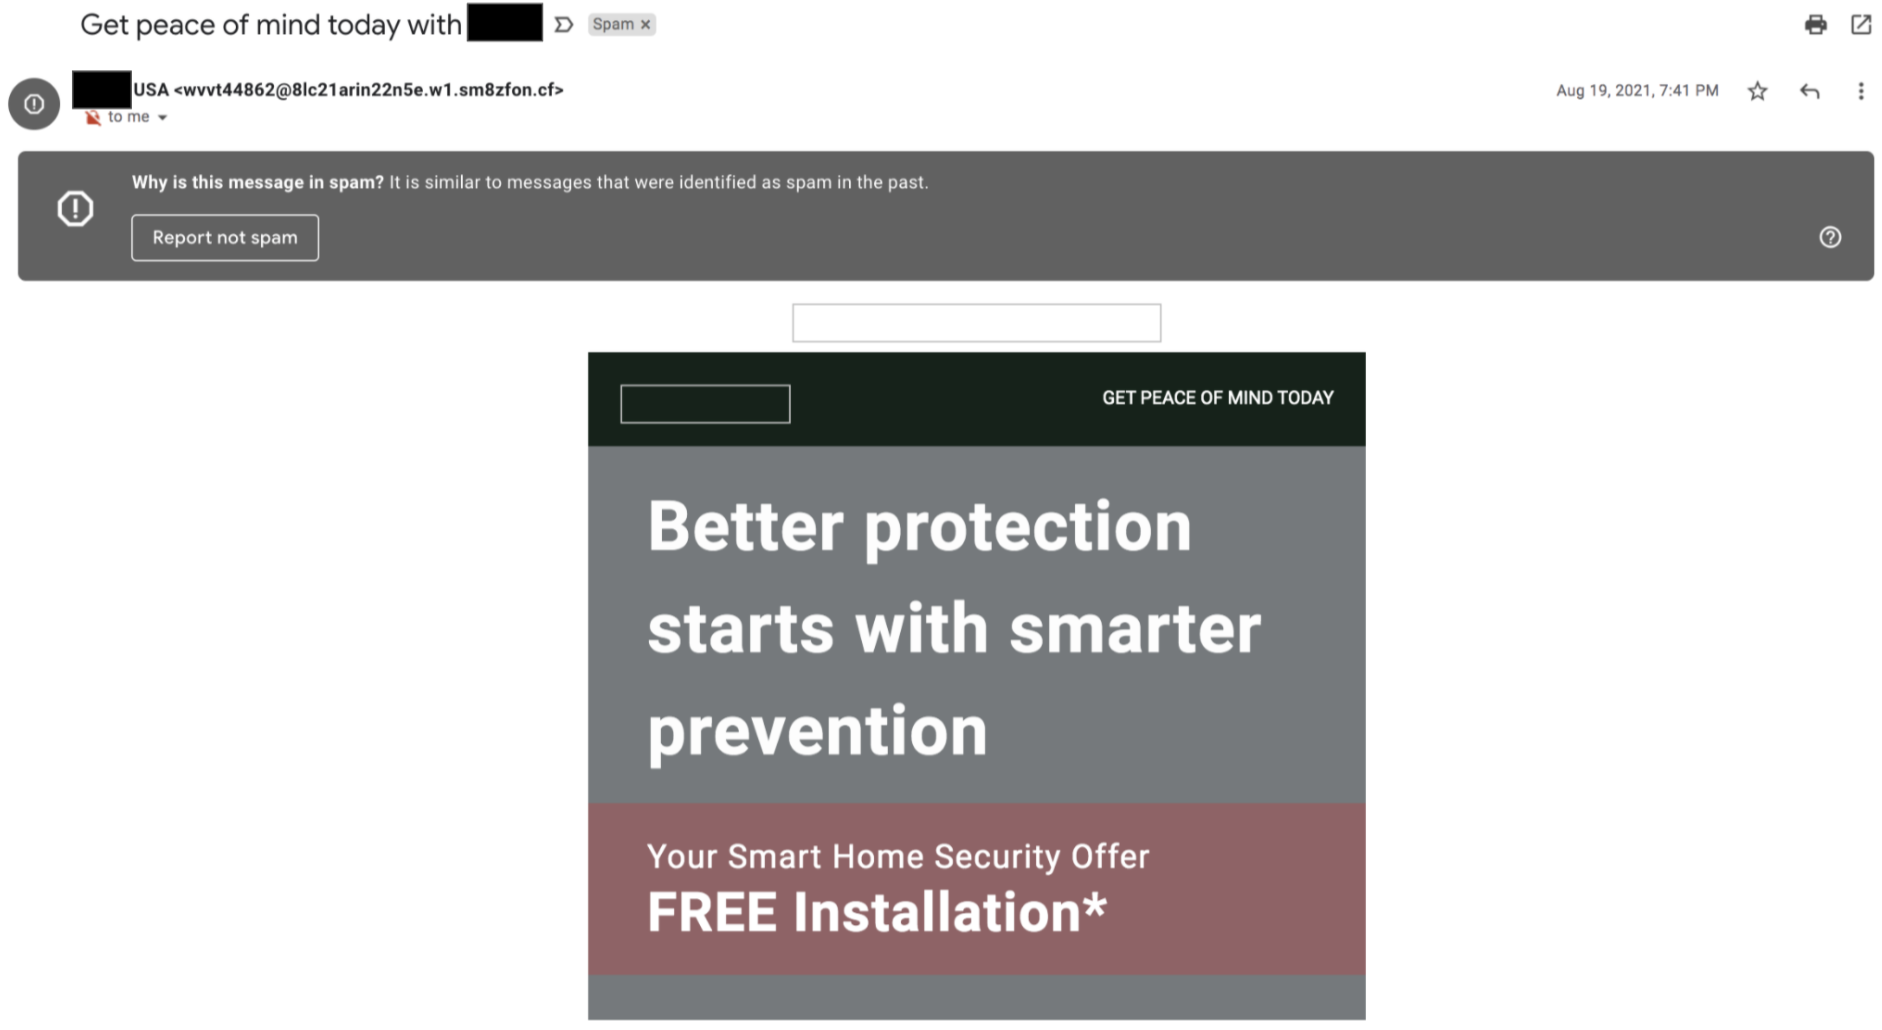

### **2. Data Preparation**

In [ ]:
## Read in the dataset
df = pd.read_csv('SpamEmail.csv')

df.head(5) # display the first 5 rows of the dataset

word_freq_make  word_freq_address  ...  capital_run_length_total  class
0            0.00               0.64  ...                       278      1
1            0.21               0.28  ...                      1028      1
2            0.06               0.00  ...                      2259      1
3            0.00               0.00  ...                       191      1
4            0.00               0.00  ...                       191      1

[5 rows x 58 columns]

In [ ]:
## Data sanity check
print('Datast shape:', df.shape) # check for the shape of the dataset

print('\nThe number of missing entries:\n', 
      df.isna().sum(axis=0)) # check for any missing values

print('\nThe number of duplicated rows:', 
      df.duplicated().sum()) # check for any duplicated rows

Datast shape: (4601, 58)

The number of missing entries:
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs

In [ ]:
## Dropping the duplicated rows
df = df[~df.duplicated()]

In [ ]:
## Check the data type of each column
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [ ]:
## Count the number of instances in each class (1: Spam)
df['class'].value_counts()

0    2531
1    1679
Name: class, dtype: int64

In [ ]:
## Define the input and the labels
X = df.iloc[:, :-1] # excluding the ""class" column
y = df['class'] # no need for label encoding 

In [ ]:
## Splitting the input into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=0) # setting the random_state enables us to reproduce the results

In [ ]:
## Split the training set further, before any scaling or modeling
X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.15,
                                      random_state=0)

### **3. SVM and Precision-Recall Trade-off**

In [ ]:
## Create a pipeline
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('svc', SVC(max_iter=1e7, kernel='rbf', gamma='auto',
                                 probability=True))]) 

In [ ]:
## Tuning the hyperparameter C via cross-validation (scoring: recall)
parameters = {'svc__C': np.logspace(0, 3, 10)} # the range for parameter C
split = StratifiedKFold(4, shuffle=True, random_state=0) # defines the CV folds 
grid = GridSearchCV(pipeline, parameters, cv=split, scoring='recall')

grid.fit(X_t, y_t) # trains different pipelines on the training set
pipeline_best_recall = grid.best_estimator_ # returns the best pipeline

print('Cross-validation score (recall):', np.mean(cross_val_score(
    pipeline_best_recall, X_t, y_t, cv=split, scoring='recall')))

## Comptute the precision for the best pipeline selected based on recall
print('Cross-validation score (precision):', np.mean(cross_val_score(
    pipeline_best_recall, X_t, y_t, cv=split, scoring='precision')))
## Optimal value for the hyperparameter C
print('The hyper-parameter C value in the best pipeline:', 
      pipeline_best_recall.named_steps['svc'].C) 

Cross-validation score (recall): 0.8938499702976832
Cross-validation score (precision): 0.922215649005603
The hyper-parameter C value in the best pipeline: 21.544346900318832
Cross-validation score (recall): 0.8938499702976832
Cross-validation score (precision): 0.922215649005603
The hyper-parameter C value in the best pipeline: 21.544346900318832


In [ ]:
## Tuning the hyperparameter C via cross-validation (scoring: precision)
parameters = {'svc__C': np.logspace(0, 3, 10)} # the range for parameter C
split = StratifiedKFold(4, shuffle=True, random_state=0) # defines the CV folds 
grid = GridSearchCV(pipeline, parameters, cv=split, scoring='precision')

grid.fit(X_t, y_t) # trains different pipelines on the training set
pipeline_best_precision = grid.best_estimator_ # returns the best pipeline

print('Cross-validation score (precision):', np.mean(cross_val_score(
    pipeline_best_precision, X_t, y_t, cv=split, scoring='precision')))

## Comptute the recall for the best pipeline selected based on precision
print('Cross-validation score (recall):', np.mean(cross_val_score(
    pipeline_best_precision, X_t, y_t, cv=split, scoring='recall')))

## Optimal value for the hyperparameter C
print('The hyper-parameter C value in the best pipeline:', 
      pipeline_best_precision.named_steps['svc'].C) 

Cross-validation score (precision): 0.9367568858846789
Cross-validation score (recall): 0.8797551208994301
The hyper-parameter C value in the best pipeline: 1.0


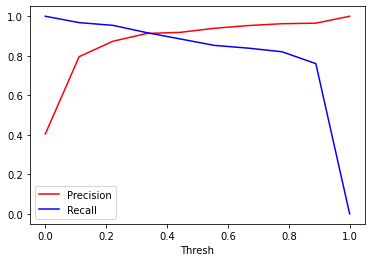

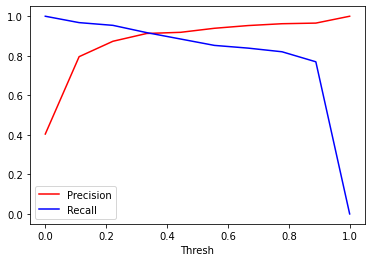

In [ ]:
## Impact of the threshold value on the precision and recall scores
pipeline_best_recall.fit(X_t, y_t) 
n = 10
thresh = np.linspace(0, 1, n) # probability thresholds
precisions = np.zeros_like(thresh)
recalls = np.zeros_like(thresh)
for i in range(n):
    C = confusion_matrix(y_v, pipeline_best_recall.predict_proba(X_v)[:, 1] >= thresh[i])
    precisions[i] = C[1, 1] / (C[1, 1] + C[0, 1]) if C[0, 1] != 0 else 1
    recalls[i] = C[1, 1] / (C[1, 1] + C[1, 0])
plt.plot(thresh, precisions, 'r', thresh, recalls, 'b')
plt.legend(['Precision', 'Recall'])
plt.xlabel('Thresh')
plt.show()

### **4. Testing the Final Model Against the Test Set**

In [ ]:
## Compute the recall on the test set
pipeline_best_recall.fit(X_train, y_train) # training the best pipeline on the whole training set
thresh_chosen = 0.3
C = confusion_matrix(y_test, 
                     pipeline_best_recall.predict_proba(X_test)[:, 1] >= thresh_chosen)
print('Confusion matrix:\n', C)
print('\nRecall:', C[1, 1] / (C[1, 1] + C[1, 0]))
print('\nPrecision:', C[1, 1] / (C[1, 1] + C[0, 1]))

Confusion matrix:
 [[341  35]
 [ 16 240]]

Recall: 0.9375

Precision: 0.8727272727272727
Confusion matrix:
 [[342  34]
 [ 17 239]]

Recall: 0.93359375

Precision: 0.8754578754578755
